In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

#so i can see all the columns
pd.set_option('display.max_columns', None)

In [2]:
#got the table from https://nces.ed.gov/ccd/elsi/tableGenerator.aspx?savedTableID=357854
#need to click a bunch of check boxes and the interface can only handle a few years at a time
#then exported as a csv once it had generated the table I needed
#the csv version of the table brings in lines that the begining that throw everything off so you have to cut the first 6
#there is a footer that isn't necessary, but also doesn't really hurt anything, so I removed it as well (7 lines total)

df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_bardstown_95.csv', skiprows= range(0,6),skipfooter=7)

<ipython-input-2-8fdac58b3fd2>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_bardstown_95.csv', skiprows= range(0,6),skipfooter=7)


In [3]:
#replaced all the symbols in the df to 0s so that I can change these columns into intergers since they are currently objects
df=df.replace(['†','–','="0"','‡'],'0')

In [4]:
#changing the columns below into intergers from objects so that calculations and visualizations can be done. 
df.columns=['Agency Name', 'State Name Latest available year',
       'Agency ID - NCES Assigned Latest available year',
       'Agency Name 1998-99', 'Agency Name 1997-98',
       'Agency Name 1996-97', 'Agency Name 1995-96',
       'Agency Name 1994-95', 'Agency Name 1993-94',
       'Agency Name 1992-93', 'County Number 1998-99',
       'County Number 1997-98', 'County Number 1996-97',
       'County Number 1995-96', 'County Number 1994-95',
       'County Number 1993-94', 'County Number 1992-93',
       'Grade 12 Students 1998-99',
       'Grade 12 Students 1997-98',
       'Grade 12 Students 1996-97',
       'Grade 12 Students 1995-96',
       'Grade 12 Students 1994-95',
       'Grade 12 Students 1993-94',
       'Grade 12 Students 1992-93',
       'Diploma Recipients 1998-99',
       'Diploma Recipients 1997-98',
       'Diploma Recipients 1996-97',
       'Diploma Recipients 1995-96',
       'Diploma Recipients 1994-95',
       'Diploma Recipients 1993-94',
       'Diploma Recipients 1992-93',
       'Total General Revenue 1998-99',
       'Total General Revenue 1997-98',
       'Total General Revenue 1996-97',
       'Total General Revenue 1995-96',
       'Total General Revenue 1994-95',
       'Total Current Expenditures - El-Sec Education 1998-99',
       'Total Current Expenditures - El-Sec Education 1997-98',
       'Total Current Expenditures - El-Sec Education 1996-97',
       'Total Current Expenditures - El-Sec Education 1995-96',
       'Total Current Expenditures - El-Sec Education 1994-95',
       'Total Revenue  per Pupil 1998-99',
       'Total Revenue  per Pupil 1997-98',
       'Total Revenue  per Pupil 1996-97',
       'Total Revenue  per Pupil 1995-96',
       'Total Revenue  per Pupil 1994-95',
       'Total Current Expenditures - Instruction per Pupil 1998-99',
       'Total Current Expenditures - Instruction per Pupil']

In [5]:
df[['Grade 12 Students 1998-99',
       'Grade 12 Students 1997-98',
       'Grade 12 Students 1996-97',
       'Grade 12 Students 1995-96',
       'Grade 12 Students 1994-95',
       'Grade 12 Students 1993-94',
       'Grade 12 Students 1992-93',
       'Diploma Recipients 1998-99',
       'Diploma Recipients 1997-98',
       'Diploma Recipients 1996-97',
       'Diploma Recipients 1995-96',
       'Diploma Recipients 1994-95',
       'Diploma Recipients 1993-94',
       'Diploma Recipients 1992-93',
       'Total General Revenue 1998-99',
       'Total General Revenue 1997-98',
       'Total General Revenue 1996-97',
       'Total General Revenue 1995-96',
       'Total General Revenue 1994-95',
       'Total Current Expenditures - El-Sec Education 1998-99',
       'Total Current Expenditures - El-Sec Education 1997-98',
       'Total Current Expenditures - El-Sec Education 1996-97',
       'Total Current Expenditures - El-Sec Education 1995-96',
       'Total Current Expenditures - El-Sec Education 1994-95',
       'Total Revenue  per Pupil 1998-99',
       'Total Revenue  per Pupil 1997-98',
       'Total Revenue  per Pupil 1996-97',
       'Total Revenue  per Pupil 1995-96',
       'Total Revenue  per Pupil 1994-95',
       'Total Current Expenditures - Instruction per Pupil 1998-99',
       'Total Current Expenditures - Instruction per Pupil']]= df[['Grade 12 Students 1998-99',
       'Grade 12 Students 1997-98',
       'Grade 12 Students 1996-97',
       'Grade 12 Students 1995-96',
       'Grade 12 Students 1994-95',
       'Grade 12 Students 1993-94',
       'Grade 12 Students 1992-93',
       'Diploma Recipients 1998-99',
       'Diploma Recipients 1997-98',
       'Diploma Recipients 1996-97',
       'Diploma Recipients 1995-96',
       'Diploma Recipients 1994-95',
       'Diploma Recipients 1993-94',
       'Diploma Recipients 1992-93',
       'Total General Revenue 1998-99',
       'Total General Revenue 1997-98',
       'Total General Revenue 1996-97',
       'Total General Revenue 1995-96',
       'Total General Revenue 1994-95',
       'Total Current Expenditures - El-Sec Education 1998-99',
       'Total Current Expenditures - El-Sec Education 1997-98',
       'Total Current Expenditures - El-Sec Education 1996-97',
       'Total Current Expenditures - El-Sec Education 1995-96',
       'Total Current Expenditures - El-Sec Education 1994-95',
       'Total Revenue  per Pupil 1998-99',
       'Total Revenue  per Pupil 1997-98',
       'Total Revenue  per Pupil 1996-97',
       'Total Revenue  per Pupil 1995-96',
       'Total Revenue  per Pupil 1994-95',
       'Total Current Expenditures - Instruction per Pupil 1998-99',
       'Total Current Expenditures - Instruction per Pupil']].astype('float')

In [6]:
#using describe to get aggregate data on data set
#allows me to replace zeroes with Nans so that mean isn't counting missing values as 0
df = df.replace(0, np.NaN)
#assigned the mean to a specific index number at the very end
df.loc[18958]=df.mean()
# because there is no such thing as the mean of a string, the 'Agency Name' comes back as a Nan, so this gives it a name so
# that I can call on it later
df['Agency Name']= df['Agency Name'].fillna("NATIONAL AVERAGE")
#pulling out the schools that are surrounding bardstown, the school i'm interested in, district number is more helpful than city here
# also resetting the index 

bardstown_df=df[(df['County Number 1995-96']=='21179')| (df['County Number 1995-96']=='21229')| (df['County Number 1995-96']=='21155')| (df['County Number 1995-96']=='21123')| (df['County Number 1995-96']=='21005')| (df['County Number 1995-96']=='21215')| (df['County Number 1995-96']=='21029')| (df['County Number 1995-96']=='21093')| (df['Agency Name']=='NATIONAL AVERAGE')].reset_index(drop=True)
# only the school districts directly surrounding bardstown and bardstown itself
strpk_lean=bardstown_df.drop([0,3,6,7,10,12,16])
strpk_lean

,Agency Name,State Name Latest available year,Agency ID - NCES Assigned Latest available year,Agency Name 1998-99,Agency Name 1997-98,Agency Name 1996-97,Agency Name 1995-96,Agency Name 1994-95,Agency Name 1993-94,Agency Name 1992-93,County Number 1998-99,County Number 1997-98,County Number 1996-97,County Number 1995-96,County Number 1994-95,County Number 1993-94,County Number 1992-93,Grade 12 Students 1998-99,Grade 12 Students 1997-98,Grade 12 Students 1996-97,Grade 12 Students 1995-96,Grade 12 Students 1994-95,Grade 12 Students 1993-94,Grade 12 Students 1992-93,Diploma Recipients 1998-99,Diploma Recipients 1997-98,Diploma Recipients 1996-97,Diploma Recipients 1995-96,Diploma Recipients 1994-95,Diploma Recipients 1993-94,Diploma Recipients 1992-93,Total General Revenue 1998-99,Total General Revenue 1997-98,Total General Revenue 1996-97,Total General Revenue 1995-96,Total General Revenue 1994-95,Total Current Expenditures - El-Sec Education 1998-99,Total Current Expenditures - El-Sec Education 1997-98,Total Current Expenditures - El-Sec Education 1996-97,Total Current Expenditures - El-Sec Education 1995-96,Total Current Expenditures - El-Sec Education 1994-95,Total Revenue per Pupil 1998-99,Total Revenue per Pupil 1997-98,Total Revenue per Pupil 1996-97,Total Revenue per Pupil 1995-96,Total Revenue per Pupil 1994-95,Total Current Expenditures - Instruction per Pupil 1998-99,Total Current Expenditures - Instruction per Pupil
1,ANDERSON COUNTY,Kentucky,2100120,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,ANDERSON CO,21005,21005,21005,21005,21005,21005,21005,185.00000,197.000000,176.000000,191.000000,190.000000,162.000000,167.000000,184.000000,174.000000,153.000000,177.000000,168.000000,NaN,154.000000,1.919700e+07,1.801100e+07,1.787800e+07,1.573700e+07,1.214300e+07,1.643400e+07,1.617300e+07,1.533300e+07,1.379600e+07,1.077200e+07,5479.000000,5587.000000,6116.000000,5109.000000,3988.000000,2978.000000,3159.000000
2,BARDSTOWN INDEPENDENT,Kentucky,2100270,BARDSTOWN IND,BARDSTOWN IND,BARDSTOWN IND,BARDSTOWN IND,BARDSTOWN IND,BARDSTOWN IND,BARDSTOWN IND,21179,21179,21179,21179,21179,21179,21179,102.00000,92.000000,81.000000,78.000000,80.000000,87.000000,70.000000,113.000000,93.000000,79.000000,77.000000,78.000000,90.000000,67.000000,1.164100e+07,1.000700e+07,9.091000e+06,9.150000e+06,8.418000e+06,9.887000e+06,8.804000e+06,8.691000e+06,8.266000e+06,7.949000e+06,6417.000000,5925.000000,5636.000000,5854.000000,5473.000000,3271.000000,3086.000000
4,BULLITT COUNTY,Kentucky,2100750,BULLITT CO,BULLITT CO,BULLITT CO,BULLITT CO,BULLITT CO,BULLITT CO,BULLITT CO,21029,21029,21029,21029,21029,21029,21029,599.00000,597.000000,570.000000,576.000000,612.000000,568.000000,596.000000,580.000000,554.000000,570.000000,548.000000,554.000000,509.000000,554.000000,5.894500e+07,5.430800e+07,5.574900e+07,4.979100e+07,4.777200e+07,5.783600e+07,5.389400e+07,5.187900e+07,4.552200e+07,4.261500e+07,5475.000000,5286.000000,5534.000000,4959.000000,4807.000000,3241.000000,3129.000000
5,ELIZABETHTOWN INDEPENDENT,Kentucky,2101650,ELIZABETHTOWN IND,ELIZABETHTOWN IND,ELIZABETHTOWN IND,ELIZABETHTOWN IND,ELIZABETHTOWN IND,ELIZABETHTOWN IND,ELIZABETHTOWN IND,21093,21093,21093,21093,21093,21093,21093,165.00000,158.000000,134.000000,147.000000,141.000000,142.000000,163.000000,154.000000,152.000000,141.000000,141.000000,141.000000,NaN,169.000000,1.332100e+07,1.196100e+07,1.169100e+07,1.045500e+07,1.056400e+07,1.084700e+07,1.069200e+07,9.586000e+06,9.290000e+06,9.594000e+06,5787.000000,5452.000000,5770.000000,5031.000000,5121.000000,3017.000000,2946.000000
8,HARDIN COUNTY,Kentucky,2102490,HARDIN CO,HARDIN CO,HARDIN CO,HARDIN CO,HARDIN CO,HARDIN CO,HARDIN CO,21093,21093,21093,21093,21093,21093,21093,810.00000,879.000000,898.000000,811.000000,850.000000,869.000000,857.000000,805.000000,890.000000,901.000000,807.000000,814.000000,779.000000,780.000000,8.147900e+07,7.819900e+07,7.559700e+07,7.187300e+07,6.900200e+07,7.101600e+07,7.006600e+07,6.815800e+07

Planning on getting at least 3 schools that are year round and comparing their dropout rate and freshman grad rate with the average of those districts that surround them.  Will do the same with the cost per student and pay look at current and longterm cost as well.  Would Ideally be able to automate so that I don't have to look on a map for each school.  If I can then I could scale up to more year round schools for a more comprehensive look.  Ideally would like to automate determining schools that are year round from those that aren't so that can be scaled easily too.

Would also be nice to look at the before and after for 5 years for schools that made the transition from normal to year round. A look at schools that went the other way would be nice as well.

These two methods would allow me to compare places against themselves and against others

below is the drop out rate of bardstown and the surrounding schools in the 10-11 school year because the previous one looks weird, missing data... 

In [7]:
#stripping it down to just dropout rate to get a rough idea of how it compares across school districts over the years
bardstown_before_after=strpk_lean[['Agency Name','Diploma Recipients 1998-99', 'Diploma Recipients 1997-98',
       'Diploma Recipients 1996-97', 'Diploma Recipients 1995-96',
       'Diploma Recipients 1994-95', 'Diploma Recipients 1993-94',
       'Diploma Recipients 1992-93', 'Grade 12 Students 1998-99',
       'Grade 12 Students 1997-98', 'Grade 12 Students 1996-97',
       'Grade 12 Students 1995-96', 'Grade 12 Students 1994-95',
       'Grade 12 Students 1993-94', 'Grade 12 Students 1992-93']]
bardstown_before_after

,Agency Name,Diploma Recipients 1998-99,Diploma Recipients 1997-98,Diploma Recipients 1996-97,Diploma Recipients 1995-96,Diploma Recipients 1994-95,Diploma Recipients 1993-94,Diploma Recipients 1992-93,Grade 12 Students 1998-99,Grade 12 Students 1997-98,Grade 12 Students 1996-97,Grade 12 Students 1995-96,Grade 12 Students 1994-95,Grade 12 Students 1993-94,Grade 12 Students 1992-93
1,ANDERSON COUNTY,184.000000,174.000000,153.000000,177.000000,168.000000,NaN,154.000000,185.00000,197.000000,176.000000,191.000000,190.000000,162.000000,167.000000
2,BARDSTOWN INDEPENDENT,113.000000,93.000000,79.000000,77.000000,78.000000,90.000000,67.000000,102.00000,92.000000,81.000000,78.000000,80.000000,87.000000,70.000000
4,BULLITT COUNTY,580.000000,554.000000,570.000000,548.000000,554.000000,509.000000,554.000000,599.00000,597.000000,570.000000,576.000000,612.000000,568.000000,596.000000
5,ELIZABETHTOWN INDEPENDENT,154.000000,152.000000,141.000000,141.000000,141.000000,NaN,169.000000,165.00000,158.000000,134.000000,147.000000,141.000000,142.000000,163.000000
8,HARDIN COUNTY,805.000000,890.000000,901.000000,807.000000,814.000000,779.000000,780.000000,810.00000,879.000000,898.000000,811.000000,850.000000,869.000000,857.000000
9,LARUE COUNTY,152.000000,108.000000,138.000000,127.000000,123.000000,120.000000,142.000000,157.00000,114.000000,143.000000,136.000000,134.000000,121.000000,155.000000
11,MARION COUNTY,199.000000,226.000000,220.000000,214.000000,212.000000,NaN,182.000000,206.00000,239.000000,216.000000,197.000000,208.000000,177.000000,196.000000
13,NELSON COUNTY,321.000000,289.000000,277.000000,283.000000,286.000000,257.000000,256.000000,331.00000,280.000000,296.000000,286.000000,300.000000,246.000000,276.000000
14,SPENCER COUNTY,113.000000,79.000000,104.000000,80.000000,75.000000,74.000000,72.000000,99.00000,78.000000,112.000000,92.000000,73.000000,77.000000,83.000000
15,WASHINGTON COUNTY,139.000000,117.000000,152.000000,128.000000,117.000000,106.000000,116.000000,139.00000,129.000000,142.000000,130.000000,126.000000,114.000000,109.000000


In [8]:
#dividing the two columns to get rate of senior graduation 
bardstown_before_after['Senior Graduation Rate 92-93']=bardstown_before_after['Diploma Recipients 1992-93']/bardstown_before_after['Grade 12 Students 1992-93']
bardstown_before_after['Senior Graduation Rate 93-94']=bardstown_before_after['Diploma Recipients 1993-94']/bardstown_before_after['Grade 12 Students 1993-94']
bardstown_before_after['Senior Graduation Rate 94-95']=bardstown_before_after['Diploma Recipients 1994-95']/bardstown_before_after['Grade 12 Students 1994-95']
bardstown_before_after['Senior Graduation Rate 95-96']=bardstown_before_after['Diploma Recipients 1995-96']/bardstown_before_after['Grade 12 Students 1995-96']
bardstown_before_after['Senior Graduation Rate 96-97']=bardstown_before_after['Diploma Recipients 1996-97']/bardstown_before_after['Grade 12 Students 1996-97']
bardstown_before_after['Senior Graduation Rate 97-98']=bardstown_before_after['Diploma Recipients 1997-98']/bardstown_before_after['Grade 12 Students 1997-98']
bardstown_before_after['Senior Graduation Rate 98-99']=bardstown_before_after['Diploma Recipients 1998-99']/bardstown_before_after['Grade 12 Students 1998-99']
bardstown_sen_grad_rate= bardstown_before_after[['Agency Name','Senior Graduation Rate 92-93',
       'Senior Graduation Rate 93-94', 'Senior Graduation Rate 94-95',
       'Senior Graduation Rate 95-96', 'Senior Graduation Rate 96-97',
       'Senior Graduation Rate 97-98', 'Senior Graduation Rate 98-99']]
bardstown_sen_grad_rate

<ipython-input-8-2f77ddd98585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bardstown_before_after['Senior Graduation Rate 92-93']=bardstown_before_after['Diploma Recipients 1992-93']/bardstown_before_after['Grade 12 Students 1992-93']
<ipython-input-8-2f77ddd98585>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bardstown_before_after['Senior Graduation Rate 93-94']=bardstown_before_after['Diploma Recipients 1993-94']/bardstown_before_after['Grade 12 Students 1993-94']
<ipython-input-8-2f77ddd98585>:4

,Agency Name,Senior Graduation Rate 92-93,Senior Graduation Rate 93-94,Senior Graduation Rate 94-95,Senior Graduation Rate 95-96,Senior Graduation Rate 96-97,Senior Graduation Rate 97-98,Senior Graduation Rate 98-99
1,ANDERSON COUNTY,0.922156,NaN,0.884211,0.926702,0.869318,0.883249,0.994595
2,BARDSTOWN INDEPENDENT,0.957143,1.034483,0.975000,0.987179,0.975309,1.010870,1.107843
4,BULLITT COUNTY,0.929530,0.896127,0.905229,0.951389,1.000000,0.927973,0.968280
5,ELIZABETHTOWN INDEPENDENT,1.036810,NaN,1.000000,0.959184,1.052239,0.962025,0.933333
8,HARDIN COUNTY,0.910152,0.896433,0.957647,0.995068,1.003341,1.012514,0.993827
9,LARUE COUNTY,0.916129,0.991736,0.917910,0.933824,0.965035,0.947368,0.968153
11,MARION COUNTY,0.928571,NaN,1.019231,1.086294,1.018519,0.945607,0.966019
13,NELSON COUNTY,0.927536,1.044715,0.953333,0.989510,0.935811,1.032143,0.969789
14,SPENCER COUNTY,0.867470,0.961039,1.027397,0.869565,0.928571,1.012821,1.141414
15,WASHINGTON COUNTY,1.064220,0.929825,0.928571,0.984615,1.070423,0.906977,1.000000


In [9]:
#used bardstown_sen_grad_rate to and melt command to pivot table long, 
#also sorts the values so that they are grouped by 'Agency name'
full_melt2= pd.melt(bardstown_sen_grad_rate,id_vars=['Agency Name'], value_vars=['Senior Graduation Rate 92-93',
       'Senior Graduation Rate 93-94', 'Senior Graduation Rate 94-95',
       'Senior Graduation Rate 95-96', 'Senior Graduation Rate 96-97',
       'Senior Graduation Rate 97-98', 'Senior Graduation Rate 98-99'])
#pulls year out of full_pivot df and gives it it's own column 
full_melt2['year']=full_melt2['variable'].str.extract(r'(\d+)$').astype('int')#.drop(columns='variable')
#and then removes the variable column that is no longer necessary
full_melt2=full_melt2.drop(columns='variable').sort_values(by= ['Agency Name', 'year'])
# not using groupby allows for all distritcts to be plotted together
full_melt2

,Agency Name,value,year
0,ANDERSON COUNTY,0.922156,93
11,ANDERSON COUNTY,NaN,94
22,ANDERSON COUNTY,0.884211,95
33,ANDERSON COUNTY,0.926702,96
44,ANDERSON COUNTY,0.869318,97
...,...,...,...
31,WASHINGTON COUNTY,0.928571,95
42,WASHINGTON COUNTY,0.984615,96
53,WASHINGTON COUNTY,1.070423,97
64,WASHINGTON COUNTY,0.906977,98


In [10]:
#separte dfs for each district that can each be plugged into graph
y1=full_melt2[full_melt2['Agency Name']== 'ANDERSON COUNTY']
y2=full_melt2[full_melt2['Agency Name']== 'BARDSTOWN INDEPENDENT']
y3=full_melt2[full_melt2['Agency Name']== 'BULLITT COUNTY']
y4=full_melt2[full_melt2['Agency Name']== 'ELIZABETHTOWN INDEPENDENT']
y5=full_melt2[full_melt2['Agency Name']== 'HARDIN COUNTY']
y6=full_melt2[full_melt2['Agency Name']== 'LARUE COUNTY']
y7=full_melt2[full_melt2['Agency Name']== 'MARION COUNTY']
y8=full_melt2[full_melt2['Agency Name']== 'NELSON COUNTY']
y9=full_melt2[full_melt2['Agency Name']== 'SPENCER COUNTY']
y10=full_melt2[full_melt2['Agency Name']== 'WASHINGTON COUNTY']
y99=full_melt2[full_melt2['Agency Name']== 'NATIONAL AVERAGE']

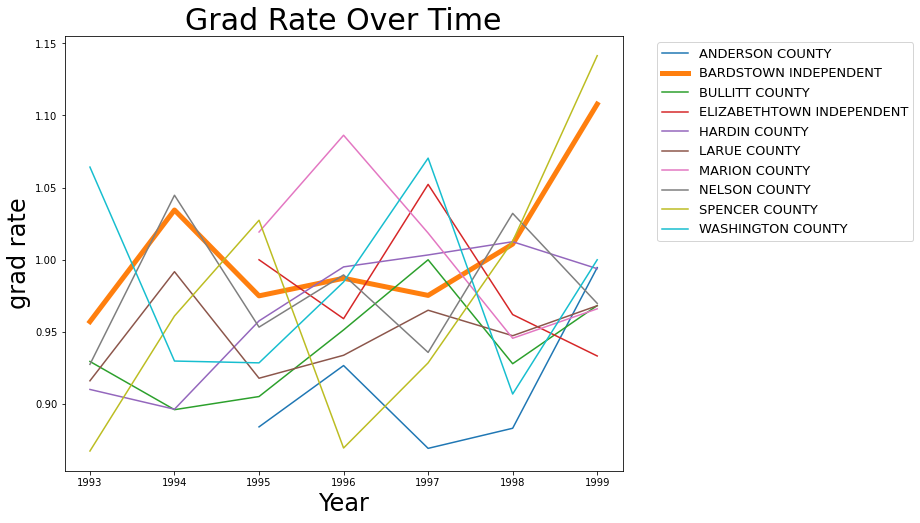

In [11]:
#increase plot size with figsize=(10,8)
fig,ax=plt.subplots(figsize=(10,8))
# plot two lines
x1= y1['year']
y1_1=y1['value']
x2= y2['year']
y2_2= y2['value']
x3= y3['year']
y3_3= y3['value']
x4= y4['year']
y4_4= y4['value']
x5= y5['year']
y5_5=y5['value']
x6= y6['year']
y6_6= y6['value']
x7= y7['year']
y7_7= y7['value']
x8= y8['year']
y8_8= y8['value']
x9= y9['year']
y9_9=y9['value']
x10= y10['year']
y10_10= y10['value']


#use (linewidth=5, label='y99') to increase the line width of the two factors i want to bring attention to
plt.plot(x1, y1_1)
plt.plot(x2, y2_2, linewidth=5, label='y2')
plt.plot(x3, y3_3)
plt.plot(x4, y4_4)
plt.plot(x5, y5_5)
plt.plot(x6, y6_6)
plt.plot(x7, y7_7)
plt.plot(x8, y8_8)
plt.plot(x9, y9_9)
plt.plot(x10, y10_10)


#plt.plot(full_melt, emp_countB, 'o-b')
# set axis titles
plt.xlabel("Year",fontsize= 24)
plt.ylabel("grad rate",fontsize= 24)
# set chart title
plt.title("Grad Rate Over Time",fontsize= 30)
 #legend--bbox_to_anchor=(1.05, 1.0), loc='upper left' moves the legend to the upper left instead of inside graph
plt.legend(['ANDERSON COUNTY', 'BARDSTOWN INDEPENDENT', 'BULLITT COUNTY',
       'ELIZABETHTOWN INDEPENDENT', 'HARDIN COUNTY', 'LARUE COUNTY',
       'MARION COUNTY', 'NELSON COUNTY', 'SPENCER COUNTY',
       'WASHINGTON COUNTY'], bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize= 13)
plt.xticks([93,94,95,96,97,98,99], [1993,1994,1995,1996,1997,1998,1999])
plt.show()